# Lab 05
## Central Limit Theorem (CLT)


The theorem says that under rather general circumstances, if you sum *independent* random variables and normalize
them accordingly, then at the limit (when you sum lots of them) you’ll get a normal distribution.

The classical version of CLT states that:

Suppose that $X_i$ are independent, identically distributed random variables with mean $\mu$ and variance $\sigma^2$.

Then $\sqrt{n} \frac{\sum_i^n{X_i} - n\mu }{\sigma} \rightarrow N (0, 1).$

The meaning of $Y_n \rightarrow Y$ is as follows: for each interval [a, b],
$Pr[a ≤ Y_n ≤ b]  \rightarrow Pr[a ≤ Y ≤ b].$

Note that the type of distribution of $X_i$ is not specified.


In [19]:
import numpy as np
import pandas as pd

def kolmogorov_smirnov(samples, origin_cdf):
    N = len(samples)
    d_stat = [max(origin_cdf(s) - (i-1)/N, i/N - origin_cdf(s))
              for i, s in enumerate(sorted(samples), start=1)]
    
    return max(d_stat)

In [28]:
s_count = 1000

norm = np.random.normal(0, 1, s_count)
laplace = np.random.laplace(0, 1, s_count)
t = np.random.standard_t(3, s_count)
lognorm = np.random.lognormal(0, 1, s_count)


In [44]:
from scipy.stats import norm as Norm

conf = {0.1: 1.22, 0.05: 1.36, 0.2: 1.07}

print('Y1 test statistic (Norm)   ', kolmogorov_smirnov(norm, Norm.cdf))
print('Y2 test statistic (Laplace)', kolmogorov_smirnov(laplace, Norm.cdf))
print('Y3 test statistic (T-distr)', kolmogorov_smirnov(t, Norm.cdf))
print('Y4 test statistic (Lognorm)', kolmogorov_smirnov(lognorm, Norm.cdf))

print('Confidence level a=0.1, D <', conf[0.1] / np.sqrt(s_count))

Y1 test statistic (Norm)    0.0272851989435
Y2 test statistic (Laplace) 0.0682775350941
Y3 test statistic (T-distr) 0.0680225620808
Y4 test statistic (Lognorm) 0.529046251904
Confidence level a=0.1, D < 0.0385797874541


### Exercise 0
Let $S_n = \sum_{i=1}^{n}U_i$ for $n = 1, 2,..., 12$ - the sum of 12 uniform distributions. 

What is the mean and the variance?

Sample from $S_n$ 1000 times and plot the histogram of its normalized sample distribution ($\frac{\sum_i^n{X_i} - n\mu }{\sigma \sqrt{n}}$).
Plot the pdf for asymptotic Gaussian.

In [ ]:
import numpy as np
np.random.seed(42)
N = 12
samples = np.zeros(1000)
for i in range(1000):
    u = np.random.uniform(size=N)
    samples[i] = np.sum(u) - (N/2)

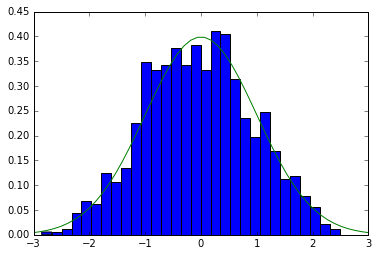

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
# 1
x = np.linspace(-3,3)
plt.hist(samples, 30, normed=True);
dist_asympt = norm(0,1)
plt.plot(x, dist_asympt.pdf(x));


### Exercise 1
Without the usage of statistical packages sample from binomial distribution (imitating 5 coin tosses) 10000 times. 

Plot the histogram of sample distribution (with any convenient packages).

Plot the pdf of a Gaussian to which the binomial distribution should converge asymptotically. The parameters for this Gaussian can be estimated using CLT, consider the binomial distribution as a distribution of the sum of independent random variables.

Repeat the same procedure for 10 and 100 coin tosses.

In [192]:
import scipy.stats as stats

# 1. sample from binomial distribution (n=5) without using statistical packages.

def binomial(sample_size, samples_count=10000):
    p, q = 0.5, 0.5
    
    samples = np.zeros(samples_count)
    
    for i in range(samples_count):
        s = [np.round(np.random.random(1)) for t in range(sample_size)]
        samples[i] = (np.sum(s) - sample_size * p) / np.sqrt(p * q * sample_size)
    
    return samples

binomial(5, 10)

array([ 0.4472136 ,  0.4472136 ,  0.4472136 , -0.4472136 ,  0.4472136 ,
       -0.4472136 ,  1.34164079,  0.4472136 ,  0.4472136 , -0.4472136 ])

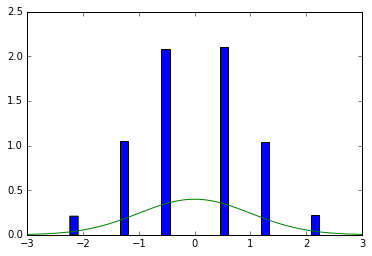

In [193]:
# 2. plot the histogram of sample and pdf of a Gaussian.
from collections import Counter


def plot_histogram(samples):
#     mode_count = stats.mode(samples).count[0]
#     print(mode_count)
    plt.hist(samples, 30, normed=True)
    
    x = np.linspace(-3, 3)
    dist_asympt = norm(0, 1)
    plt.plot(x, dist_asympt.pdf(x))
    
    plt.show()
    
plot_histogram(binomial(5, 10000))

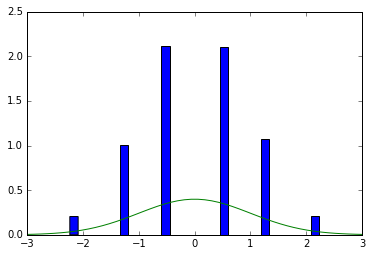

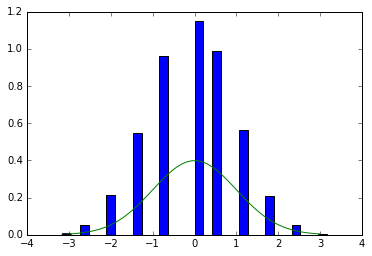

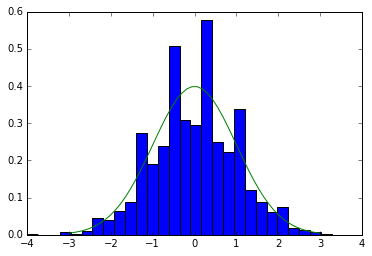

In [194]:
# 3. repeat the same procedure with n = 10, 100.
s_sizes = [5, 10, 100]
samples_count = 10000

for s_size in s_sizes:
    samples = binomial(s_size, samples_count)
    
    plot_histogram(samples)

### Exercise 2

The average height of adult male in Russia is 177.2 cm with standard deviation 7.42.
We suppose that the distribution of the height is Gaussain.
Imagine that we take samples of 100 men and measure their height. What will be the distribution of the means for these samples?


Depict the original distribution.

Make random samples of size 100 from original distribution.
Depict the empirical distribution of the sample means and the asymptotical distribution of sample means from CLT.

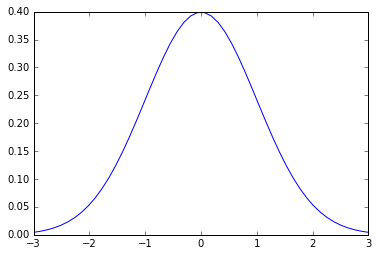

In [195]:
# 1. Depict the original distribution of male height.
distr_asympt = norm(loc=177.2, scale=7.42)

x = np.linspace(-3, 3)
plt.plot(x, dist_asympt.pdf(x))

plt.show()

In [196]:
# 2. Make random samples of size 100
def get_random_samples(n_samples, s_size=100):
    return np.array([np.random.normal(loc=177.2, scale=7.42, size=s_size) for i in range(n_samples)])


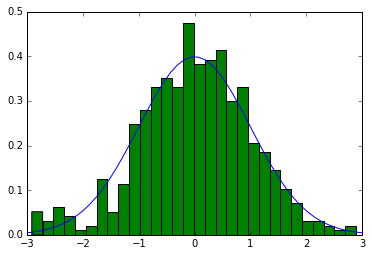

In [197]:
# 3. Depict the empirical distribution of the sample means and 
# the asymptotical distribution of sample means from CLT

# counting means
samples = get_random_samples(500, s_size=10000)

means = np.array([s.mean() for s in samples])

# evaluting in z-score
m, std = means.mean(), means.std()
means = (means - m) / std

plt.plot(x, dist_asympt.pdf(x))
plt.hist(means, 30, normed=True)

plt.show()

## Multiple comparison problem



When many correlation coefficients are calculated from a given set of data, the risk of obtaining significant results by chance is increased.

There are several algorithms to deal with this problem.
Let's say we fix our level of type I error to $\alpha$.

**Bonferroni**

Bonferroni method simply reduces $\alpha$ level to $\frac{\alpha}{k}$ where $k$ - the number of comparisons.

It is very conservative though quite popular for its simplicity.


**Holm**

For Holm correction you should sort p-values in ascending order and find the smallest one that satisfies: $p>\frac{\alpha}{k+1−i}$, where $i$ is the index in sorted array. 

This p-value and the ones that are larger are considered insignificant.

**Benjamini-Hochberg**

In ordered array of p-values find the largest one that satisfies: $p≤\frac{i}{k}\alpha$. Then this p-value and all smaller ones are considered significant.

The first two procedures control *Family Wise Error Rate* (FWER) i.e. the probability of making at least 1 error of type I. Both Bonferroni and Holm guarantee that the FWER will be not more than given level $\alpha$.

While the last method works with *False Discovery Rate* (FDR) controling the expected number of type I errors. It is then less conservative. Benjamini-Hochberg guarantees that the expected proportion of false discoveries (type I errors) over all discoveries (rejected null hypothesis) is not greater then given $\alpha$.

### Exercise 3
*Description*

There is a hypothesis that some genes are responsible for human body height. 

Full genome sequencing was performed for 2535 people from different countries i.e. the full sequence of DNA was obtained. The DNA sequence is encoded in 4 letters corresponding to different nucleotides ('A','C','G','T').

SNP (Single Nucleotide Polymorphism) is a position in genome where variation of 1 nucleotide exists in population.
For example, most of the people can have nucleotide 'A' in this position, while some others have nucleotide 'C'.

You are given the data of 5 SNP's. The data is encoded in *0,1,2*. *0* corresponds to most popular variation, *2* - less popular, *1* - is the mix of both variations (remember, we inherit 2 variants from both parents).


*Task*

1. Read the data from 'data/snp.csv' file. 

1. Perform the 1-way ANOVA test to check whether the means of 'Height' differ in groups.
Get the p-value for each SNP.

1. Perform the correction of the multiple comparison using any method (any library).

1. Make a conclusion about which SNP are connected with the human height and which are not.

In [198]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

data = pd.read_csv('data/snp.csv')
features = ['rs7859940', 'rs10816533', 'rs16966703', 'rs2793701', 'rs7606245']
dependent = 'Height'

# one-way ANOVA 
p_values = []
for f in features:
    t_test = stats.f_oneway(data[data[f] == 0]['Height'], data[data[f] == 1]['Height'], data[data[f] == 2]['Height'])
    
    p_values.append((f, t_test.pvalue))
    
# method = 'holm'
# corrected = multipletests(p_values, method=method)
# print(corrected)

# apply correction of p-values using Bonferroni method
alpha_value = 0.05 / 3

print('Corrected alpha value =', alpha_value, '\n')

decisions = [(f, p, p < alpha_value) for f, p in p_values]

for f, p, h0_true in decisions:
    print(f, p, bool(h0_true))

Corrected alpha value = 0.016666666666666666 

rs7859940 3.04465007411e-09 True
rs10816533 2.48347619421e-20 True
rs16966703 0.0215208824689 False
rs2793701 0.0268116332849 False
rs7606245 0.537427050043 False


*Conclusions*

We can claim that only those SNP are connected with the human height which p-value is less than our p-value=0.05 corrected by the Bonferroni method. In our case, such SNPs are rs7859940 and rs10816533.